In [1]:
from loader import Loader

In [2]:
tds = Loader.load_imgs("train")

In [3]:
tds.shape

(20000, 64, 64, 3)

In [4]:
vds = Loader.load_imgs("val")

In [5]:
vds.shape

(10000, 64, 64, 3)

In [6]:
from factory import ModelFactory

In [79]:
enc_dec = ModelFactory.get_enc_dec()

In [41]:
from helper import Helper

In [78]:
Helper.train_enc_dec(enc_dec, (tds, tds), (vds, vds), 64, 100, 0.01, 0.0)

Train on 20000 samples, validate on 10000 samples
Epoch 1/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.7022
Epoch 00001: val_loss improved from inf to 1.45755, saving model to Model/tmp_enc_dec.h5
20000/20000 [==============================] - 14s 679us/sample - loss: 1.6997 - val_loss: 1.4575
Epoch 2/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4062
Epoch 00002: val_loss improved from 1.45755 to 1.42872, saving model to Model/tmp_enc_dec.h5
20000/20000 [==============================] - 11s 566us/sample - loss: 1.4053 - val_loss: 1.4287
Epoch 3/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.3984
Epoch 00003: val_loss did not improve from 1.42872
20000/20000 [==============================] - 11s 567us/sample - loss: 1.3972 - val_loss: 1.4289
Epoch 4/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4003
Epoch 00004: val_loss did not improve from 1.42872
20000/20000 [==============================]

Epoch 36/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4285
Epoch 00036: val_loss did not improve from 1.42872
20000/20000 [==============================] - 11s 564us/sample - loss: 1.4273 - val_loss: 1.4430
Epoch 37/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4102
Epoch 00037: val_loss did not improve from 1.42872
20000/20000 [==============================] - 11s 567us/sample - loss: 1.4089 - val_loss: 1.4484
Epoch 38/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4179
Epoch 00038: val_loss did not improve from 1.42872
20000/20000 [==============================] - 11s 565us/sample - loss: 1.4167 - val_loss: 1.4764
Epoch 39/100
19904/20000 [============================>.] - ETA: 0s - loss: 1.4109
Epoch 00039: val_loss did not improve from 1.42872
20000/20000 [==============================] - 11s 566us/sample - loss: 1.4099 - val_loss: 1.4498
Epoch 40/100
19904/20000 [============================>.] - ETA: 0s - lo

KeyboardInterrupt: 

In [11]:
from data_utils import get_val_batch, get_test_batch
import numpy as np

In [43]:
test_batch = get_test_batch(0, 1)
test_imgs = np.asarray([test_batch[0, 0], test_batch[0, 1], test_batch[0, 6]])

In [44]:
test_predicted = enc_dec.predict(test_imgs)

In [45]:
train_imgs = np.asarray([tds[0], tds[10], tds[20]])

In [46]:
predicted = enc_dec.predict(train_imgs)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_three(imgs, predicted):
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(imgs[i])
        plt.subplot(2, 3, i+4)
        plt.imshow(predicted[i])

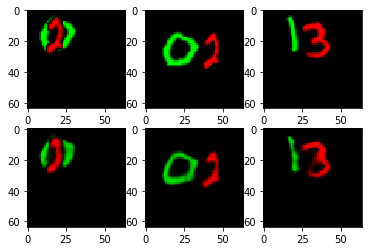

In [48]:
show_three(train_imgs, predicted)

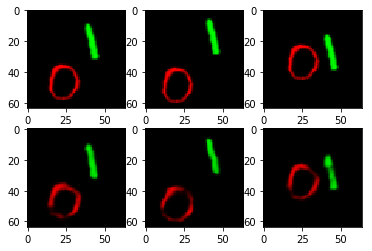

In [49]:
show_three(test_imgs, test_predicted)

In [55]:
from sklearn.metrics import mean_absolute_error

def check_mae(imgs, predicteds):
    maes = np.zeros(imgs.shape[0] * imgs.shape[3], dtype=np.float32)
    for i in range(imgs.shape[0]):
        for j in range(imgs.shape[3]):
            maes[i * 3 + j] = mean_absolute_error(imgs[i, :, :, j], predicteds[i, :, :, j])
    return np.average(maes[np.nonzero(maes)])

In [56]:
check_mae(train_imgs, predicted)

0.010981237

In [57]:
check_mae(test_imgs, test_predicted)

0.009514365

In [59]:
enc_dec

In [ ]:
Helper.save_enc_dec(enc_dec, "0617_")

In [62]:
import datetime

In [64]:
datetime.datetime.now()

datetime.datetime(2019, 6, 16, 17, 38, 40, 392913)

In [76]:
"%M%D_%H%M".format(datetime.datetime.now())
datetime.datetime.now().strftime("%m%d%H%M")

'06161741'

In [66]:
gmtime()

time.struct_time(tm_year=2019, tm_mon=6, tm_mday=16, tm_hour=17, tm_min=39, tm_sec=5, tm_wday=6, tm_yday=167, tm_isdst=0)

In [77]:
"{:%m%d%H%M}".format(datetime.datetime.now())

'06161742'